# CONTENT

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Importing Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  Let us Import and Explore the Dataset

In [107]:
# Importing the data from csv file

data = pd.read_csv("Mall_Customers.csv")

In [108]:
# Showing the head of the data

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here we have the following features :

1. CustomerID: It is the unique ID given to a customer

2. Gender: Gender of the customer

3. Age: The age of the customer

4. Annual Income(k$): It is the annual income of the customer

5. Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

In [109]:
data.shape
print("No of records:", data.shape[0])
print("No of Attributes:", data.shape[1])

No of records: 200
No of Attributes: 5


In [110]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [111]:
# Statistical measurements of the data
# For non-objective columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [112]:
# For objective columns

data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [113]:
# Checking for missing values

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We see that there are no missing values in the data

In [114]:
print("Mean of Annual Income (k$) of Female:",data['Annual Income (k$)'].loc[data['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",data['Annual Income (k$)'].loc[data['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


In [115]:
# Correlation between the columns

data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


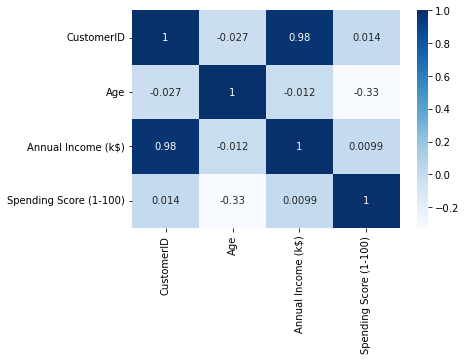

In [116]:
# visualizing the correlation

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

# Data Visualisation

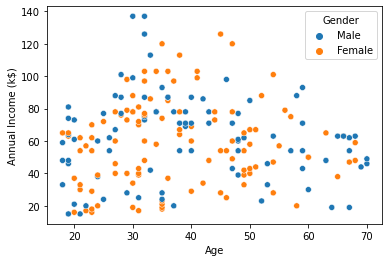

In [117]:
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='Gender',data=data)
plt.show()

We can see, there is no correlation between Age and Annual Income

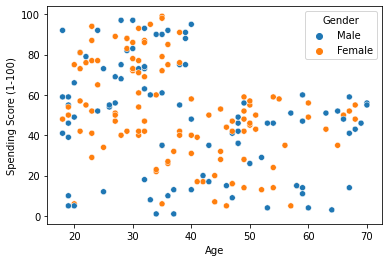

In [118]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',hue='Gender',data=data)
plt.show()

As we can observe from above scatterplot, that as Age increases the Spending Score decreases

Customers with age below 40 spend More 

Customers with age above 40 spend Less

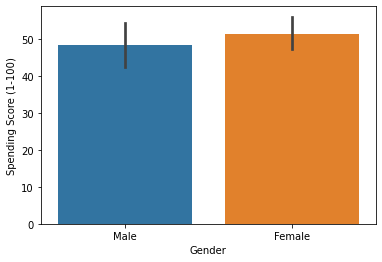

In [119]:
sns.barplot(y='Spending Score (1-100)',x='Gender',data=data)
plt.show()

Female customer's spending score is more than that of Male customers.

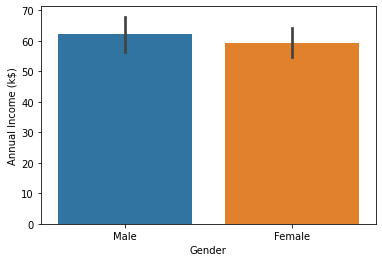

In [120]:
sns.barplot(y='Annual Income (k$)',x='Gender',data=data)
plt.show()

From the above barplot, it is seen that Male customers earn more in comparison to Female customers.

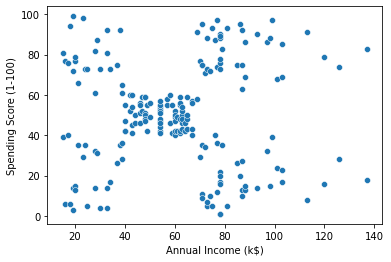

In [121]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.show()

From the above scatterplot, we can see there are different catagories of cutomers falling into different groups. We shall study about it as we move further with our analysis.

# Feature Selection

In [122]:
# Dropping unimportant columns

data.drop(columns=['CustomerID','Gender','Age'],inplace=True)

In [123]:
data = pd.get_dummies(data, drop_first=True)

In [124]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Scaling of data

In [125]:
# Importing StandardScaler sklearn library

from sklearn.preprocessing import StandardScaler

In [126]:
# Scaling the data

sc = StandardScaler()
data_s=sc.fit_transform(data)

In [127]:
data_s

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Model Application

## K-Means clustering

In [128]:
# Importing KMeans model

from sklearn.cluster import KMeans

In [129]:
# Choosing the number of clusters
# inertia = WCSS (Within Cluster Sum Of Squares)

ks= range(1,10)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k, init='k-means++')
    model.fit(data_s)
    inertia.append(model.inertia_)

In [130]:
inertia

[399.99999999999994,
 269.69101219276405,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.067795914519614,
 44.86475569922555,
 37.22935522094305,
 32.42168353234745]

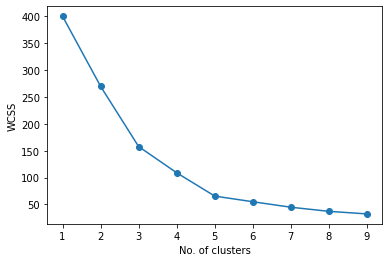

In [131]:
# Plotting the Elbow Graph

plt.plot(ks, inertia, '-o')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(ks)
plt.show()

Optimum number of clusters is 5

In [132]:
# Storing the model

model_f = KMeans(n_clusters=5)

In [133]:
# Predicting the labels

label = model_f.fit_predict(data_s)

In [134]:
label

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [135]:
# Adding the label to data to make final data

data_fin = pd.read_csv('Mall_Customers.csv')
data_fin['label']= label

In [136]:
data_fin

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [137]:
# Cluster centers

model_f.cluster_centers_

array([[-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [138]:
data_s = pd.DataFrame(data_s)

In [139]:
data_s['label']=label

In [140]:
data_s

,0,1,label
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,3
197,2.497807,0.923953,2
198,2.917671,-1.250054,3


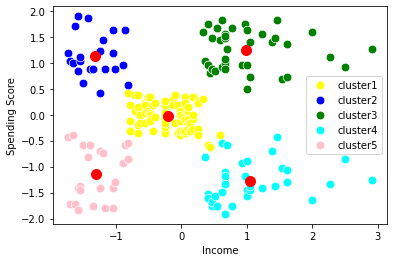

In [141]:
# Visualising all 5 clusters in K-Means clustering

sns.scatterplot(x=data_s[data_s['label']==0][0], y=data_s[data_s['label']==0][1], color='yellow', label='cluster1', s=75)
sns.scatterplot(x=data_s[data_s['label']==1][0], y=data_s[data_s['label']==1][1], color='blue', label='cluster2', s=75)
sns.scatterplot(x=data_s[data_s['label']==2][0], y=data_s[data_s['label']==2][1], color='green', label='cluster3', s=75)
sns.scatterplot(x=data_s[data_s['label']==3][0], y=data_s[data_s['label']==3][1], color='cyan', label='cluster4', s=75)
sns.scatterplot(x=data_s[data_s['label']==4][0], y=data_s[data_s['label']==4][1], color='pink', label='cluster5', s=75)
plt.xlabel('Income')
plt.ylabel('Spending Score')

#Plotting centeroids

plt.scatter(x=model_f.cluster_centers_[:,0], y=model_f.cluster_centers_[:,1], color='red', s=100)
plt.show()

# Scoring

In [142]:
# Importing Silhouette score

from sklearn.metrics import silhouette_score

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [143]:
# Scoring from K-means clustering

silhouette_score(data_s.iloc[:,[0,1]], data_s['label'])

0.5546571631111091

## Hierarchical Clustering

In [144]:
data_s

,0,1,label
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,3
197,2.497807,0.923953,2
198,2.917671,-1.250054,3


In [145]:
import scipy.cluster.hierarchy as sch

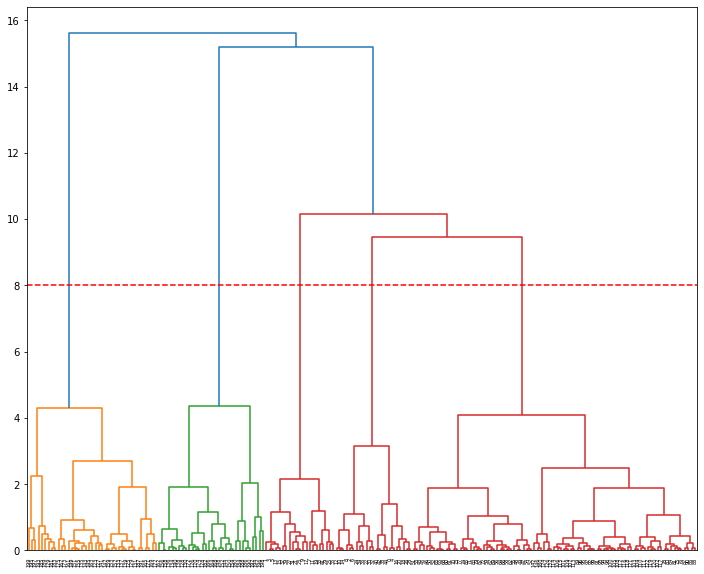

In [146]:
# Plotting of Dendogram

plt.figure(figsize=(12,10))
sch.dendrogram(sch.linkage(data_s.iloc[:,[0,1]].values, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

From the above Dendogram, it can be seen that we will have 5 clusters as the line cuts through 5 points

## Agglomerative Clustering

In [147]:
# Importing Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

In [148]:
X=data_s.iloc[:,[0,1]]
agglo_model = AgglomerativeClustering(n_clusters=5)

In [149]:
# Fitting the data

agglo_model.fit(X)

AgglomerativeClustering(n_clusters=5)

In [150]:
# Adding the Agglo_label to the data

X['Agglo_label'] = agglo_model.fit_predict(X)

In [151]:
X

,0,1,Agglo_label
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0


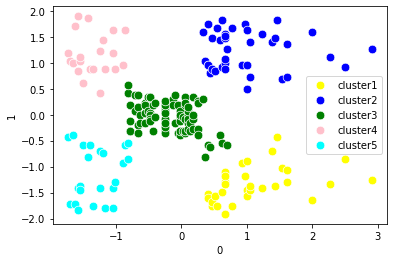

In [152]:
# Visualising all 5 clusters in Agglomerative clustering

sns.scatterplot(x=X[X['Agglo_label']==0][0], y=X[X['Agglo_label']==0][1], color='yellow', label='cluster1', s=75)
sns.scatterplot(x=X[X['Agglo_label']==1][0], y=X[X['Agglo_label']==1][1], color='blue', label='cluster2', s=75)
sns.scatterplot(x=X[X['Agglo_label']==2][0], y=X[X['Agglo_label']==2][1], color='green', label='cluster3', s=75)
sns.scatterplot(x=X[X['Agglo_label']==3][0], y=X[X['Agglo_label']==3][1], color='pink', label='cluster4', s=75)
sns.scatterplot(x=X[X['Agglo_label']==4][0], y=X[X['Agglo_label']==4][1], color='cyan', label='cluster5', s=75)
plt.show()

## Scoring

In [153]:
silhouette_score(data_s.iloc[:,[0,1]], X['Agglo_label'])

0.5538089226688662

## Conclusion

By analysing the customers data, we found some insights which are as follows:

1. Most of the customers whose age is below 40 spend More and vice-versa.
2. Female customer's Spending Score is More than Male customer's.
3. There are 5 types of customers:
        i. Low Annual Income - High Spending Score
        ii. Low Annual Income - Low Spending Score
        iii. Medium Annual Income - Medium Spending Score
        iv. High Annual Income - Low Spending Score
        v. High Annual Income - High Spending Score

## Strategy

i. As we see, Female customers are spending more, so we can target them and offer them attractive offers and coupons to make them spend even more.

ii. As we observe, the 1st group of customers with Low Annual Income and High Spending Score, can be our easy target and with only some effort from our end we can make them spend even more than what they doing now.

iii. We can also target the 5th group of customers with High Annual Income and High Spending Score, with exclusive offers and outstanding service to spend more.

iv. We should put more efforts into the 4th group of customers with High Annual Income and Low Spending Score, as this group of customers are our potential target which the money to spend more but just needs a little push and outstanding advertisement to converge into our Highest Spending Group.

v. Last but not the least, we must study each group of customers spending seperately to offer them customised coupons and discounts so as to converge them to spend more.